In [10]:
# Comparative Distribution Analysis of Train and Test Datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [2]:
# Get random rows from the train dataset
train.sample(5)

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
2812,2812,92.0,13.925328,7.75,3.1,15.570358,13.161829,2.595,1.458,0.620833,0.661224,1.95335,2.5
9137,9137,46.0,15.550000,23.00,4.0,48.719500,9.877100,2.115,1.905,1.120000,0.478880,9.54775,3.5
7773,7773,100.0,8.836996,10.00,4.8,20.833018,12.301760,2.857,1.542,0.774000,0.499196,0.70966,2.0
6730,6730,100.0,7.558488,10.00,4.8,20.298893,12.040830,2.755,1.631,0.910000,0.492719,0.77755,2.8
2303,2303,228.0,16.676996,31.00,5.6,70.924495,10.733640,2.884,1.728,1.422000,0.468340,3.01757,2.0


In [3]:
# Constants

TARGET = 'Hardness'

In [5]:
# Selecting numerical variables from the train dataset, excluding 'id' and TARGET
num_var = train.drop(['id', TARGET], axis=1).select_dtypes(include=np.number).columns
print(num_var)

Index(['allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average'],
      dtype='object')


In [6]:
# Combining train and test datasets for comparative analysis
# 'Source' column is added to label data from each dataset
df = pd.concat([
    train[num_var].assign(Source='Train'), 
    test[num_var].assign(Source='Test')
], axis=0, ignore_index=True)

In [7]:
df.sample(5)

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Source
8062,79.0,15.593000,39.500000,3.500000,90.226700,8.124150,1.980,2.015,1.285,0.447985,7.86200,Train
6972,122.0,8.885992,12.800000,4.800000,26.385218,11.260300,2.810,1.740,0.860,0.492820,1.93680,Train
17067,136.0,13.612327,11.333333,4.333333,22.718434,11.217767,2.775,1.710,0.925,0.479689,0.77752,Test
6205,66.0,9.107996,13.600000,5.000000,29.525338,10.600980,2.796,1.700,0.920,0.492736,1.03213,Train
16599,52.0,4.663996,10.400000,5.200000,20.833018,11.431540,2.824,1.752,0.824,0.499404,0.49916,Test


C:\Users\Adeniyi Babalola\AppData\Local\Temp\ipykernel_1480\3219437202.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


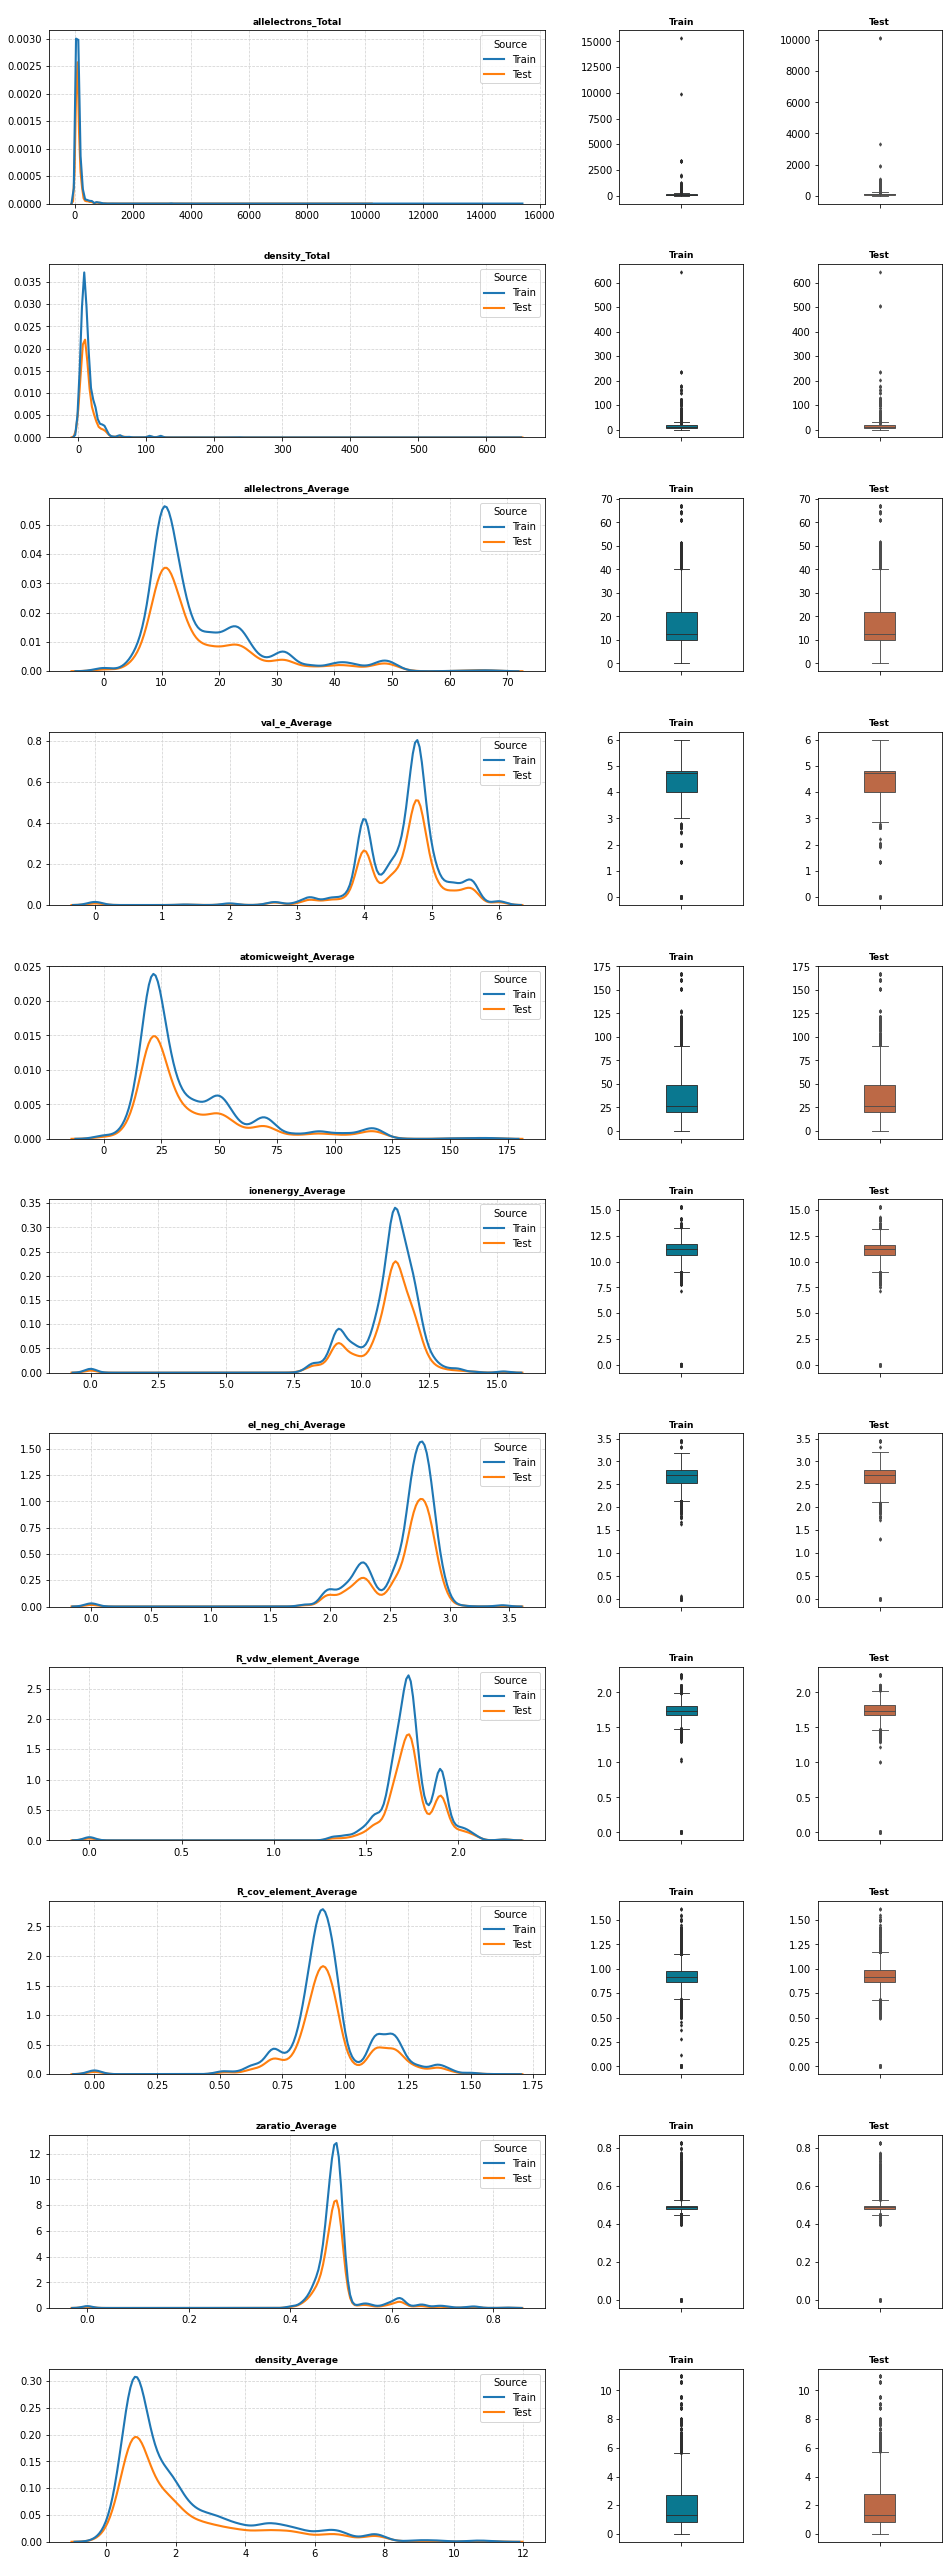

In [8]:
# Setting up the subplot grid with one row per variable and three columns
# Adjusting horizontal and vertical spacing and column widths
fig, axes = plt.subplots(len(num_var), 3, figsize=(16, len(num_var) * 4.2), 
                         gridspec_kw={'hspace': 0.35, 'wspace': 0.3, 'width_ratios': [0.80, 0.20, 0.20]})

# Looping through each numerical variable to create plots
for i, col in enumerate(num_var):
    # Density plot for each variable
    ax = axes[i, 0]
    sns.kdeplot(data=df[[col, 'Source']], x=col, hue='Source', ax=ax, linewidth=2.1)
    ax.set_title(f"\n{col}", fontsize=9, fontweight='bold')
    ax.grid(visible=True, which='both', linestyle='--', color='lightgrey', linewidth=0.75)
    ax.set(xlabel='', ylabel='')

    # Box plot for the variable in the train dataset
    ax = axes[i, 1]
    sns.boxplot(data=df.loc[df.Source == 'Train', [col]], y=col, width=0.25, saturation=0.90, linewidth=0.90, fliersize=2.25, color='#037d97', ax=ax)
    ax.set(xlabel='', ylabel='')
    ax.set_title("Train", fontsize=9, fontweight='bold')

    # Box plot for the variable in the test dataset
    ax = axes[i, 2]
    sns.boxplot(data=df.loc[df.Source == 'Test', [col]], y=col, width=0.25, fliersize=2.25, saturation=0.6, linewidth=0.90, color='#E4591E', ax=ax)
    ax.set(xlabel='', ylabel='')
    ax.set_title("Test", fontsize=9, fontweight='bold')

# Adjusting layout to prevent plot overlap and ensure clear visualization
plt.tight_layout()

# Displaying the complete set of plots
plt.show()

In [16]:
# Aggregate a column to understand its relation to the target
understand_data = pd.DataFrame()

for col in num_var:
    column_agg = train.groupby(col).agg({TARGET: 'mean'}).sort_values(by='Hardness', ascending=False)
    print(f'The top 5 values by mean are: ')
    print(column_agg.head())
    print(f'The bottom 5 values by mean are: ')
    print(column_agg.tail())

The top 5 values by mean are: 
                    Hardness
allelectrons_Total          
32.00                  10.00
12.00                  10.00
21.00                   7.80
249.32                  7.80
83.00                   6.98
The bottom 5 values by mean are: 
                    Hardness
allelectrons_Total          
387.7                    2.0
391.3                    2.0
389.7                    1.5
15300.0                  1.5
394.0                    1.0
The top 5 values by mean are: 
               Hardness
density_Total          
12.352000          10.0
8.558488           10.0
1.350000           10.0
1.370000           10.0
1.663464           10.0
The bottom 5 values by mean are: 
               Hardness
density_Total          
8.803996            1.5
15.200000           1.5
15.625328           1.5
643.093804          1.5
23.550000           1.3
The top 5 values by mean are: 
                      Hardness
allelectrons_Average          
8.923077                   7.8
14.9

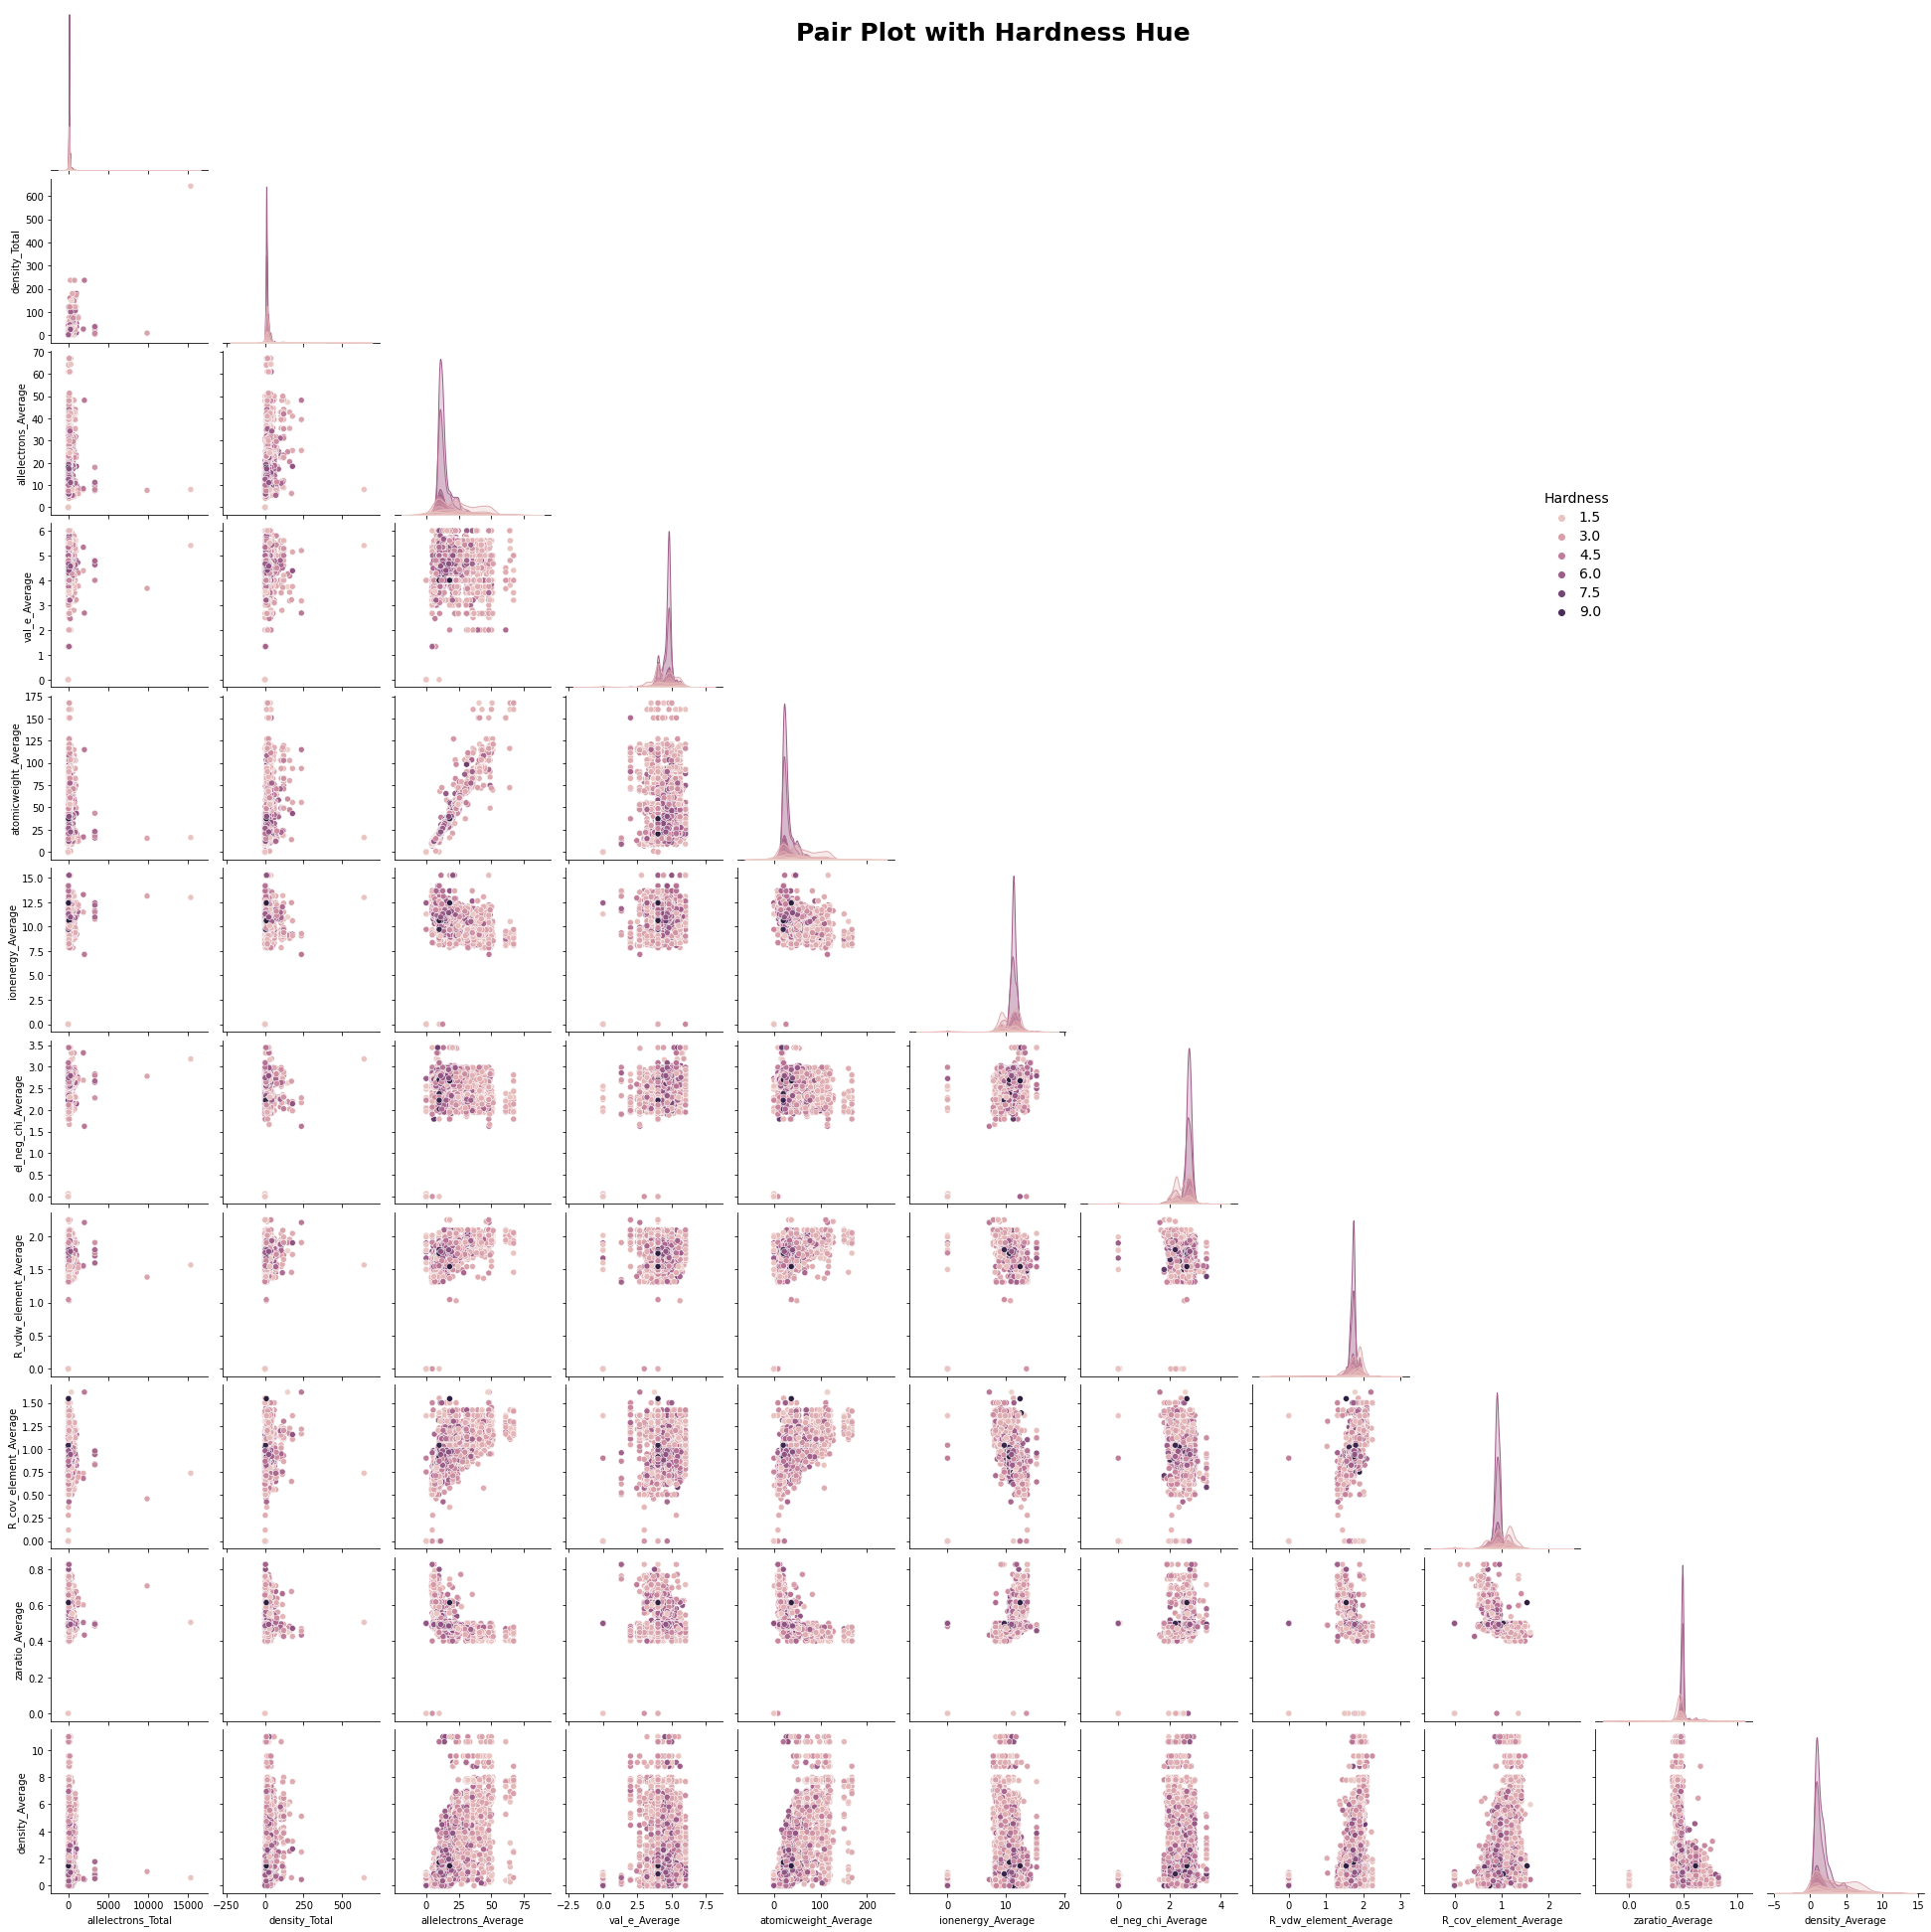

In [18]:
def plot_pair(df_train, num_var, target, plotname):
    '''
    Function to create a pairplot for visualizing relationships between numeric variables.
    Parameters:
    df_train: DataFrame containing the data.
    num_var: List of numeric variables to include in the plot.
    target: The target variable used for coloring the data points.
    plotname: Title for the plot.
    '''
    
    # Creating a pairplot with specified numeric variables, colored by the target variable
    g = sns.pairplot(data=df_train, x_vars=num_var, y_vars=num_var, hue=target, corner=True)
    
    # Adjusting the position of the legend on the plot
    g._legend.set_bbox_to_anchor((0.8, 0.7))
    
    # Setting the title for the legend
    g._legend.set_title(target)
    
    # Adjusting the position of the legend
    g._legend.loc = 'upper center'
    
    # Setting the font size of the legend title
    g._legend.get_title().set_fontsize(14)
    
    # Setting the font size of the legend text
    for item in g._legend.get_texts():
        item.set_fontsize(14)

    # Adding a main title to the plot with customization
    plt.suptitle(plotname, ha='center', fontweight='bold', fontsize=25, y=0.98)
    
    # Displaying the plot
    plt.show()

plot_pair(train, num_var, TARGET, 'Pair Plot with Hardness Hue')

In [ ]:

# Calculate the average of a numerical column grouped by a categorical column
average_by_category = dataframe.groupby(cat_col)[num_col].mean()

# Sum of a numerical column grouped by a categorical column
sum_by_category = dataframe.groupby(cat_col)[num_col].sum()

# Count of rows for each category
count_by_category = dataframe.groupby(cat_col).size()

# Maximum and minimum of a numerical column grouped by a categorical column
max_by_category = dataframe.groupby(cat_col)[num_col].max()
min_by_category = dataframe.groupby(cat_col)[num_col].min()

# Standard deviation of a numerical column grouped by a categorical column
std_dev_by_category = dataframe.groupby(cat_col)[num_col].std()

# Median of a numerical column grouped by a categorical column
median_by_category = dataframe.groupby(cat_col)[num_col].median()

# Frequency of one categorical column within another categorical column
frequency_distribution = dataframe.groupby([cat_col])[cat_col].value_counts()

# Aggregating multiple metrics of a numerical column grouped by a categorical column
aggregation_by_category = dataframe.groupby(cat_col)[num_col].agg(['sum', 'mean', 'max'])

# Percentage of a category within another category
percentage_within_category = dataframe.groupby(cat_col)[cat_col].value_counts(normalize=True) * 100

# Assuming 'date_col' is a datetime column in your dataframe
# Average of a numerical column grouped by year
average_by_year = dataframe.groupby(dataframe['date_col'].dt.year)[num_col].mean()